# Imports and Functions

In [2]:
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [54]:
def z_test_h0_accepted(Z, z):
    if Z > z: # reject H0
        print('H0 rejected', 'Z =', Z, '>', 'z =', z)
        return False
    else:
        print('H0 accepted', 'Z =', Z, '<', 'z =', z)
        return True

def Z_score(population_mean_mu0, population_sd_sigma0, sample_mean_x_bar, sample_size_n):
    """
    If no population SD is given, you can use the sample SD
    """
    # https://stats.stackexchange.com/questions/463854/why-no-degrees-of-freedom-for-z-test no dof here
    return abs((sample_mean_x_bar - population_mean_mu0) / (population_sd_sigma0 / np.sqrt(sample_size_n)))

In [55]:
def t_test_h0_accepted(T, t):
    if T > t: # reject H0
        print('H0 rejected', 'T =', T, '>', 't =', t)
        return False
    else:
        print('H0 accepted', 'T =', T, '<', 't =', t)
        return True

def T_score(population_mean_mu0, sample_mean_x_bar, sample_sd_s, sample_size_n):
    # https://www.omnicalculator.com/statistics/t-test
    # degrees of freedom -> used to find t value
    return abs((sample_mean_x_bar - population_mean_mu0) / (sample_sd_s / np.sqrt(sample_size_n)))

# Serie 11

## Aufgabe 5

### Z-Test (wrong because >30 observations)

In [57]:
# H0: mu0 = 500g
# H1: mu0 != 500g
data = [495, 502, 505, 498, 490, 500]
x_bar = np.mean(data)
x_bar

498.3333333333333

In [61]:
Z = Z_score(500, np.std(data), np.mean(data), len(data))
Z

0.8411582311380759

In [62]:
a = 0.05
prop = 1 - (2 * a) # two-sided test
z = st.norm.ppf(prop)
z

1.2815515655446004

In [63]:
z_test_h0_accepted(Z, z)

H0 accepted Z = 0.8411582311380759 < z = 1.2815515655446004


True

### With Students-T

as sample has less than 30 observations

In [64]:
# H0: mu0 = 500g
# H1: mu0 != 500g
data = [495, 502, 505, 498, 490, 500]

In [65]:
T = T_score(500, np.mean(data), np.std(data), len(data))
print('T-statistic:' , T)

T-statistic: 0.8411582311380759


In [66]:
a = 0.05

In [67]:
# two-tailed checking if mean different (higher OR lower)
prop = 1 - (a / 2)

t_value = st.t.ppf(prop, len(data) - 1)
print('t critical value: ', t_value)

t critical value:  2.5705818366147395


In [13]:
# region in which the T-statistic can lie without H0 being rejected
st.t.interval(0.95, df=len(data) - 1)

(-2.5705818366147395, 2.5705818366147395)

In [14]:
t_test_h0_accepted(T, t_value)

H0 accepted T = 0.8411582311380759 < t = 2.5705818366147395


True

Our t-score is outside of the critical region, so there is not enough evidence to reject H₀.

-> No statistical evidence that mean weight of 500g is wrong.

# Serie 14

## Aufgabe 79

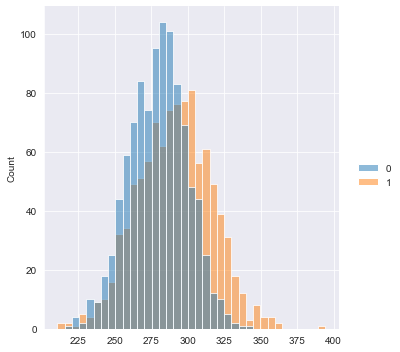

In [15]:
drive_shaft_1 = st.norm.rvs(loc=280, scale=20, size=1000)
drive_shaft_2 = st.norm.rvs(loc=292, scale=25, size=1000)
sns.displot([drive_shaft_1, drive_shaft_2])

In [16]:
# Stichprobe mit n = 25
N = 25

drive_shaft_sample_1 = st.norm.rvs(loc=280, scale=math.sqrt(20), size=25)
drive_shaft_sample_2 = st.norm.rvs(loc=292, scale=math.sqrt(25), size=25)

In [17]:
pd.DataFrame(drive_shaft_sample_1).describe()

,0
count,25.000000
mean,279.552668
std,3.848947
min,270.752108
25%,277.441404
50%,279.205300
75%,281.890740
max,286.228558


In [18]:
pd.DataFrame(drive_shaft_sample_2).describe()

,0
count,25.000000
mean,291.284129
std,3.566744
min,285.476978
25%,288.973155
50%,291.494904
75%,293.578206
max,298.848819


In [19]:
mu_s1 = np.mean(drive_shaft_sample_1)
print(mu_s1)
mu_s2 = np.mean(drive_shaft_sample_2)
print(mu_s2)

279.5526682837458
291.2841291296921


In [20]:
st.norm.pdf(0)

0.3989422804014327

H0: mu = 280 MPa
H1: mu != 280 MPa

### a) Bestimmmen sie die Grenze c bei gegebener Irrtumswahrscheinlichkeit α = 0.05.
Wie groß ist in diesem Fall die Irrtumswahrscheinlichkeit 2. Art, β?

PPF:
Density functions return the probability of an observation in the distribution. Recall the definitions of the PDF and CDF as follows:

Probability Density Function (PDF): Returns the probability for an observation having a specific value from the distribution.
Cumulative Density Function (CDF): Returns the probability for an observation equal to or lesser than a specific value from the distribution.
In order to calculate a critical value, we require a function that, given a probability (or significance), will return the observation value from the distribution.

Specifically, we require the inverse of the cumulative density function, where given a probability, we are **given the observation value that is less than or equal to the probability**.
--> This is called the percent point function (PPF), or more generally the quantile function.

In [71]:
# critical value c so that there is only a 5% chance of rejecting H0 even if it is true
critical_value_c = st.norm.ppf(0.95, loc=280, scale=20/np.sqrt(25)) # based on one-sided test and alpha of 0.05
print(critical_value_c, 'MPa')

286.5794145078059 MPa


In [72]:
# Error Type 2 - how high is probability (cdf) that we falsely accept H0 and the part is actually from the other distribution
error_type_2_prob = st.norm.cdf(critical_value_c, loc=292, scale=25/np.sqrt(25))

print((error_type_2_prob * 100).round(2), '%')

13.92 %


### b) die Grenze c bei gegebener Irrtumswahrscheinlichkeit β = 0.2.
Wie groß ist in diesem Fall die Irrtumswahrscheinlichkeit 1. Art, α?

In [23]:
# choose critical value so that probability of β error becomes 0.2
critical_value_c = st.norm.ppf(0.2, loc=292, scale=25/np.sqrt(25))
print(critical_value_c, 'MPa')

287.79189383213543 MPa


In [24]:
# calculate α when critical value based on β error 0.2
error_type_1_prob = 1 - st.norm.cdf(critical_value_c, loc=280, scale=20/np.sqrt(25))
print((error_type_1_prob * 100).round(2), '%')

2.57 %


#### c) die Grenze c, falls beide Irrtumswahrscheinlichkeiten gleich groß sein sollen, d.h. α = β?

In [25]:
critical_value_list = np.arange(280, 290, 0.001)

# c_critical_value so that
def prob_type1_error(c):
    return 1 - st.norm.cdf(c, loc=280, scale=20/np.sqrt(25))

# equals
def prob_type2_error(c):
    return st.norm.cdf(c, loc=292, scale=25/np.sqrt(25))

prob_type1_error_list = [prob_type1_error(c) for c in critical_value_list]
prob_type2_error_list = [prob_type2_error(c) for c in critical_value_list]

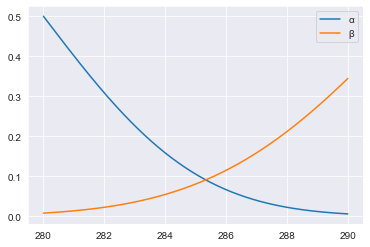

In [26]:
plt.plot(critical_value_list, prob_type1_error_list, label = 'α')
plt.plot(critical_value_list, prob_type2_error_list, label = 'β')
plt.legend()
plt.show()

**Result**: Alpha and Beta errors are equal around when c = 285.33 MPa

### d) Wie groß müsste man den Stichprobenumfang n wählen, damit beide Irrtumswahrscheinlichkeiten gleich groß sind und höchstens gleich 0.02 sind?

In [27]:
# 4x sample size for 2x reduction in probability of error

In [28]:
# fix c and find sample size that matches condition max 0.02 probability of error
c = 285.33 # from c)
sample_size_list = np.arange(25, 200)

# c_critical_value so that
def prob_type1_error(c, n):
    return 1 - st.norm.cdf(c, loc=280, scale=20/np.sqrt(n))

# equals
def prob_type2_error(c, n):
    return st.norm.cdf(c, loc=292, scale=25/np.sqrt(n))

prob_type1_error_list = [prob_type1_error(c, n) for n in sample_size_list]
prob_type2_error_list = [prob_type2_error(c, n) for n in sample_size_list]

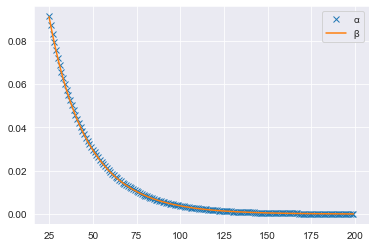

In [29]:
%matplotlib inline
plt.plot(sample_size_list, prob_type1_error_list, label = 'α', linestyle="", marker="x")
plt.plot(sample_size_list, prob_type2_error_list, label = 'β')
plt.legend()
plt.show()

With a sample size of n >= 60, the probability of error becomes lower than 0.02 %

## Aufgabe 80

In [73]:
# H0: μ = 27 J
# H1: μ != 27 J
# sigma = 2.0
# a = 0.05
sample = [33, 31, 30, 29, 24, 27, 28, 31, 25, 23]

In [74]:
pd.DataFrame(sample).describe()

,0
count,10.000000
mean,28.100000
std,3.314949
min,23.000000
25%,25.500000
50%,28.500000
75%,30.750000
max,33.000000


### z-test

In [32]:
# Z score
Z = Z_score(population_mean_mu0=27, population_sd_sigma0=2, sample_mean_x_bar=np.mean(sample), sample_size_n=len(sample))
Z

1.7392527130926108

In [33]:
# z critical value
a = 0.05
q = 1 - (a / 2) # two-sided test
z = st.norm.ppf(q)
z

1.959963984540054

In [34]:
# H0 acceptance region
st.norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [35]:
# With Z-Test:
# if Z score > z critical value: Reject H0
z_test_h0_accepted(Z, z)

H0 accepted Z = 1.7392527130926108 < z = 1.959963984540054


True

Mit einem 5% Signifikanzniveau gibt es statistische Evidenz dafür, dass die durchschnittliche Kerbschlagsarbeit 27 J ist. **H0 wird akzeptiert**.

### t-test

In [36]:
T = T_score(27, np.mean(sample), np.std(sample), len(sample))

In [37]:
a = 0.05
q = 1 - (0.05 / 2)
t = st.t.ppf(q, df=len(sample)) # t critical value (t-table based on a = 0.05 two tailed with dof 10 - 1 = 9)

In [38]:
t_test_h0_accepted(T, t)

H0 accepted T = 1.106100374479031 < t = 2.2281388519649385


True

Hypothese H0 wird auch mit dem T-Test (# of samples < 30) akzeptiert

## Aufgabe 81

In [39]:
# population: mü = 100 kg and std = 1.5 kg
# sample with 225 bags: x_bar = 99.75 kg
# H0: mü0 = 100 kg
# H1: mü0 != 100 kg
# alpha = 0.02

In [40]:
Z = Z_score(100, 1.5, 99.75, 225)
Z # score

2.5

In [41]:
a = 0.02
q = 1 - (a / 2)
z = st.norm.ppf(q)
z # critical value

2.3263478740408408

In [42]:
# H0 acceptance range
st.norm.interval(0.98)

(-2.3263478740408408, 2.3263478740408408)

In [43]:
z_test_h0_accepted(Z, z)

H0 rejected Z = 2.5 > z = 2.3263478740408408


False

at 2% significance level statistical evidence that mean weight is NOT 100 kg.

## Aufgabe 82

In [44]:
# H0: μ0 >= 12000 km
# H1: μ0 < 12000 km
# σ0 = 850
# Sample: n = 100 α = 0.03

In [45]:
# using standard error, find probability that the mean of a sample with n = 100 lands within the lowest 3% under the distribution curve
standard_error = 850 / np.sqrt(100 - 1)
st.norm.ppf(0.03, loc=12000, scale=standard_error)

11839.327160594365

Der Erwartungswert der Laufleistung muss den Wert von 11'839 km unterschreiten!

In [46]:
# what's the meaning of this in that context:
# using population standard deviation, so probability that a single value of that distribution lands within the lowest 3% under the distribution curve
st.norm.ppf(0.03, loc=12000, scale=850)

10401.325433071437

## Aufgabe 83

In [47]:
# Exhaust max. 250 mg NOx / km
# σ0 = 34 mg
# Sample: n = 100 and x_bar = 255 mg / km

# H0: μ0 <= 250 mg
# H1: μ0 > 250 mg

#### a) Kann die Vermutung der Behörde mit einer Irrtumswahrscheinlichkeit von α = 0.05 bestätigt werden?

In [75]:
Z = Z_score(250, 34, 255, 100)
Z

1.4705882352941178

In [76]:
a = 0.05
q = 1 - a
z = st.norm.ppf(q)
z

1.6448536269514722

In [50]:
z_in_mg = st.norm.ppf(q, loc = 250, scale = 34 / np.sqrt(100))
print('mean of this sample would have to be higher than', z_in_mg, 'mg')

mean of this sample would have to be higher than 255.59250233163502 mg


In [51]:
z_test_h0_accepted(Z, z)

H0 accepted Z = 1.4705882352941178 < z = 1.6448536269514722


True

Null hypothesis accepted - no statistical evidence at alpha of 0.05 that exhaust too high

#### b) Wie viele Fahrzeuge müssten getestet werden, um bei gleichbleibendem Mittelwert und Standardabweichung die Vermutung der Behörde mit einer Irrtumswahrscheinlichkeit von α = 0.05 bestätigen zu können?

Z müsste grösser als z (1.6448536269514722) werden

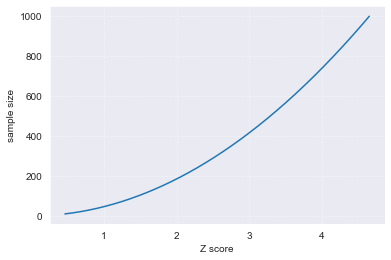

In [52]:
sample_sizes = np.arange(10, 1000, 1)

Z_scores = [Z_score(population_mean_mu0=250, population_sd_sigma0=34, sample_size_n=size, sample_mean_x_bar=255) for size in sample_sizes]

plt.clf()
plt.plot(Z_scores, sample_sizes)
plt.xlabel('Z score')
plt.ylabel('sample size')
plt.grid(alpha=.4,linestyle='--')
plt.show()

In [53]:
df = pd.DataFrame(Z_scores)
first_index_Z_bigger_than_z = df.index[df[0] > 1.6448536269514722].tolist()[0]
print('sample size needed for H0 to get rejected:', sample_sizes[first_index_Z_bigger_than_z])

sample size needed for H0 to get rejected: 126
